# Finding Animals Endemic to Africa

This notebook is designed to find more words for the `Nature` trope. [This website](https://a-z-animals.com/animals/location/africa/) contains animals specifically found in Africa. We will scrape this website for all of the animals listed, compare the names extracted with the ones already present in the `Nature` dict, and remove duplicates to create our final list. This code and the documentation will remain very similar to Tsion's previous code to extract more words.

The script below follows scraping practices outlined in [this freeCodeCamp website](https://www.freecodecamp.org/news/web-scraping-python-tutorial-how-to-scrape-data-from-a-website/).

Tsion's Note: "because scraping is an iterative process that highly depends on how the website is designed, there isn't one manual to guide the user through scraping this particular website. Instead, the user could iteratively index into the website until the list containing the words is reached."

Author: Anabelle Colmenares

In [5]:
# necessary packages
import re
from bs4 import BeautifulSoup as bs
import requests
from nltk.stem.snowball import SnowballStemmer

## Scraping The Website

These words are sourced [from this website](https://a-z-animals.com/animals/location/africa/).

In [6]:
# save url
urls = ["https://a-z-animals.com/animals/location/africa/algeria/", "https://a-z-animals.com/animals/location/africa/angola/",
        "https://a-z-animals.com/animals/location/africa/benin/", "https://a-z-animals.com/animals/location/africa/botswana/",
        "https://a-z-animals.com/animals/location/africa/burkina-faso/", "https://a-z-animals.com/animals/location/africa/burundi/",
        "https://a-z-animals.com/animals/location/africa/cameroon/", "https://a-z-animals.com/animals/location/africa/central-african-republic/",
        "https://a-z-animals.com/animals/location/africa/chad/", "https://a-z-animals.com/animals/location/africa/cote-divoire/",
        "https://a-z-animals.com/animals/location/africa/democratic-republic-of-congo/", "https://a-z-animals.com/animals/location/africa/djibouti/",
        "https://a-z-animals.com/animals/location/africa/egypt/", "https://a-z-animals.com/animals/location/africa/equatorial-guinea/",
        "https://a-z-animals.com/animals/location/africa/eritrea/", "https://a-z-animals.com/animals/location/africa/ethiopia/",
        "https://a-z-animals.com/animals/location/africa/gabon/", "https://a-z-animals.com/animals/location/africa/gambia/",
        "https://a-z-animals.com/animals/location/africa/ghana/", "https://a-z-animals.com/animals/location/africa/guinea/",
        "https://a-z-animals.com/animals/location/africa/guinea-bissau/", "https://a-z-animals.com/animals/location/africa/kenya/",
        "https://a-z-animals.com/animals/location/africa/lesotho/", "https://a-z-animals.com/animals/location/africa/liberia/",
        "https://a-z-animals.com/animals/location/africa/libya/", "https://a-z-animals.com/animals/location/africa/madagascar/",
        "https://a-z-animals.com/animals/location/africa/malawi/", "https://a-z-animals.com/animals/location/africa/mali/",
        "https://a-z-animals.com/animals/location/africa/mauritania/", "https://a-z-animals.com/animals/location/africa/morocco/",
        "https://a-z-animals.com/animals/location/africa/mozambique/", "https://a-z-animals.com/animals/location/africa/namibia/",
        "https://a-z-animals.com/animals/location/africa/niger/", "https://a-z-animals.com/animals/location/africa/nigeria/",
        "https://a-z-animals.com/animals/location/africa/republic-of-congo/", "https://a-z-animals.com/animals/location/africa/rwanda/",
        "https://a-z-animals.com/animals/location/africa/senegal/", "https://a-z-animals.com/animals/location/africa/sierra-leone/"
        "https://a-z-animals.com/animals/location/africa/somalia/", "https://a-z-animals.com/animals/location/africa/south-africa/"
        "https://a-z-animals.com/animals/location/africa/south-sudan/", "https://a-z-animals.com/animals/location/africa/sudan/",
        "https://a-z-animals.com/animals/location/africa/swaziland/", "https://a-z-animals.com/animals/location/africa/tanzania/",
        "https://a-z-animals.com/animals/location/africa/togo/", "https://a-z-animals.com/animals/location/africa/tunisia/",
        "https://a-z-animals.com/animals/location/africa/uganda/", "https://a-z-animals.com/animals/location/africa/western-sahara/",
        "https://a-z-animals.com/animals/location/africa/zambia/", "https://a-z-animals.com/animals/location/africa/zimbabwe/"]


# create array where all words will go
animals_1 = []
for url in urls:
    # send request
    res = requests.get(url)

    txt = res.text
    status = res.status_code

    # convert to a beautiful soup object
    soup = bs(res.content, 'html.parser')
    
    #get body
    body = soup.body

     # get relevant section 
    def href_match(href):
        return href and re.compile("https://a-z-animals.com/animals/.+").search(href)
    animals_html = soup.body.find_all(href=href_match)
#     print(animals_html)
    
    for animal in animals_html:
        animals_1.append(animal.text.strip())
        
print(len(animals_1), animals_1)

32781 ['Mammals', 'Reptiles', 'Fish', 'Birds', 'Amphibians', 'Animals by Location', 'Africa', 'North African', 'Mediterranean coastline', 'jackals', 'wild boars', 'Fennec foxes', 'jerboas', 'leopards', 'cheetahs', 'monkey', 'fish', 'sharks', 'hammerheads', 'reptiles', 'insect', 'ostriches', 'cranes', 'avocets', 'doves', 'eagles', 'Endangered', 'Vulnerable', 'Near Threatened', 'Critically Endangered', 'extinct', 'Scimitar oryx', 'Lion', 'Brown bear', 'Fennec fox', 'buffalo', 'hippos', 'rhinos', 'Mambas', 'Wild Boars', 'African Elephants', '', 'African Wild Dog', '', 'American Cockroach', '', 'Ant', '', 'Antelope', '', 'Armyworm', '', 'Banana Spider', '', 'Barb', '', 'Barn Owl', '', 'Barn Swallow', '', 'Bat', '', 'Bed Bugs', '', 'Bee', '', 'Beetle', '', 'Bird', '', 'Biscuit Beetle', '', 'Black Widow Spider', '', 'Brazilian Treehopper', '', 'Brown-banded Cockroach', '', 'Brown Dog Tick', '', 'Bumblebee', '', 'Butterfly', '', 'Caecilian', '', 'Camel', '', 'Caracal', '', 'Carpenter Ant', ''

## Process animals from the 2 other websites
Now we will retrieve the words from the two other websites and add them to an array.

### Website 2

In [9]:
# Website 2
url_website_2 = "https://www.edreams.com/blog/animals-in-africa-from-a-to-z/"

res_2 = requests.get(url_website_2)
txt_2 = res_2.text
status_2 = res_2.status_code

Use the `prettify` function to print the output in a properly indexed format to easily identify how the words are encoded on the website.

<body class="post-template-default single single-post postid-3683 single-format-standard wp-custom-logo animals-in-africa-from-a-to-z sidebar-primary">
 <script data='cfasync="false"' data-no-defer="1">
  if(typeof ewww_webp_supported==="undefined"){var ewww_webp_supported=!1}if(ewww_webp_supported){document.body.classList.add("webp-support")}
 </script>
 <noscript>
  <iframe height="0" src="//www.googletagmanager.com/ns.html?id=GTM-KKLQKF" style="display:none;visibility:hidden" width="0">
  </iframe>
 </noscript>
 <header class="banner navbar-od-main" role="banner">
  <div class="navbar-scrolled nav-single">
   <div class="container-fluid">
    <div class="navbar-header">
     <a class="navbar-brand" href="https://www.edreams.com/blog/">
      Travel Stories
      <img alt="eDreams Travel Blog" class="start lazyload ewww_webp_lazy_load" data-src="https://www.edreams.com/blog/wp-content/uploads/sites/3/2017/05/logo-mini-main.png" data-src-webp="https://www.edreams.com/blog/wp-content/u
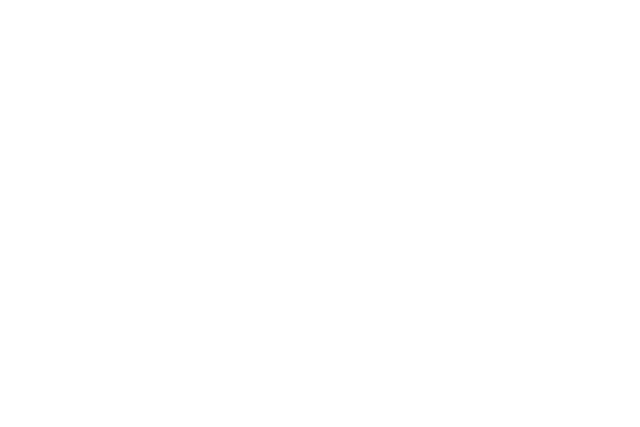
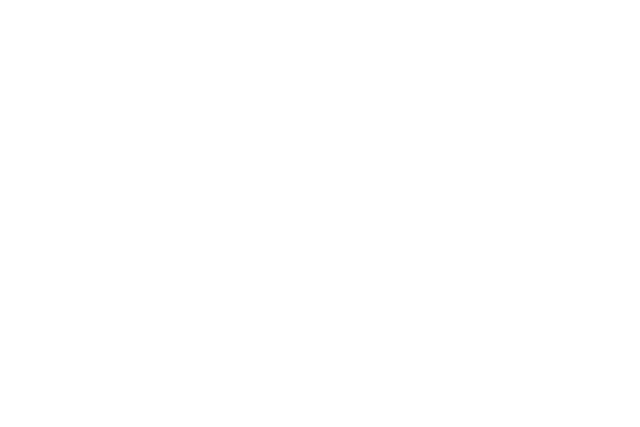
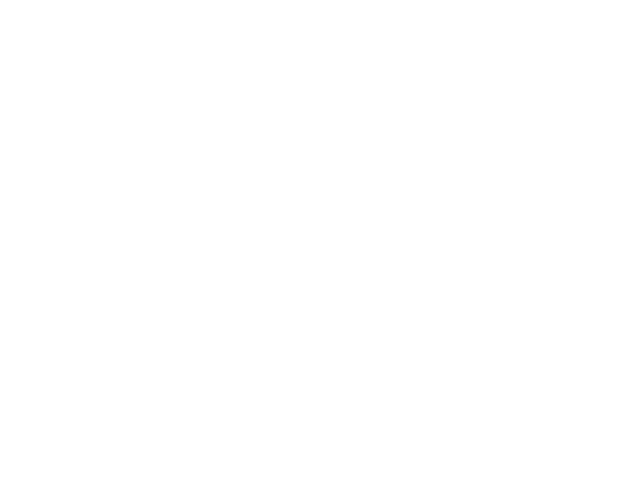
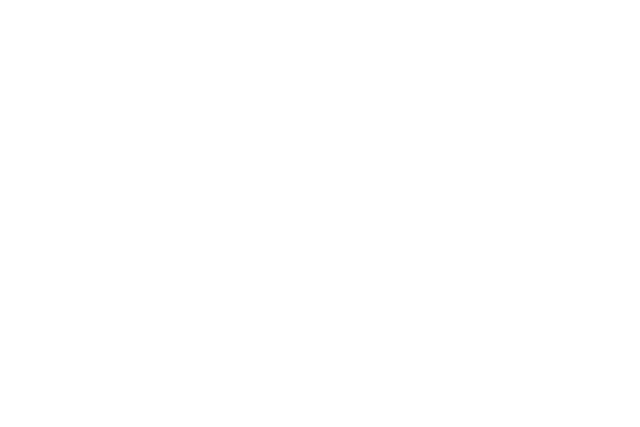
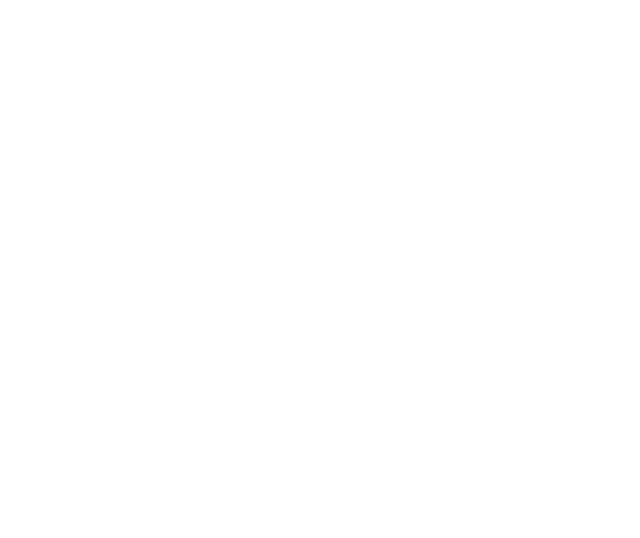
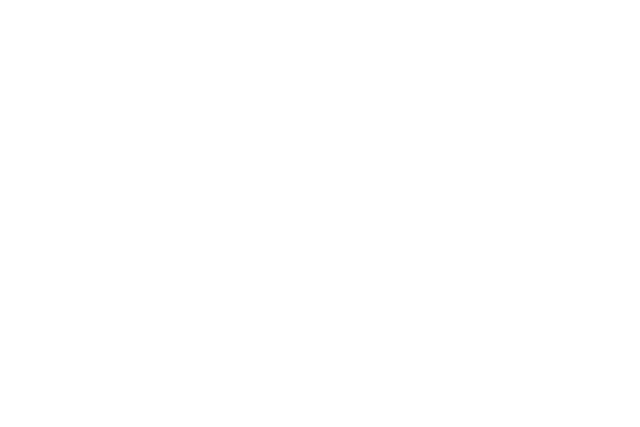
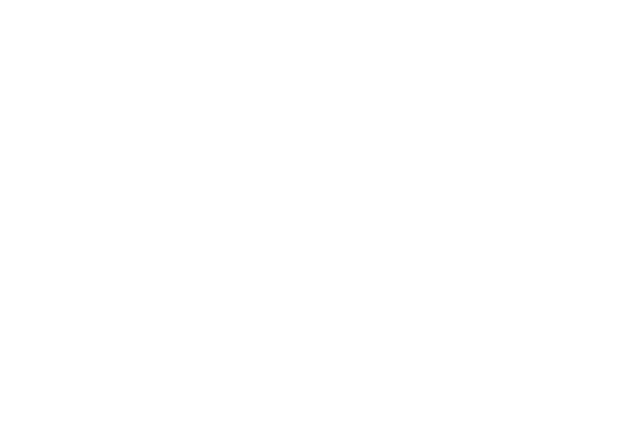
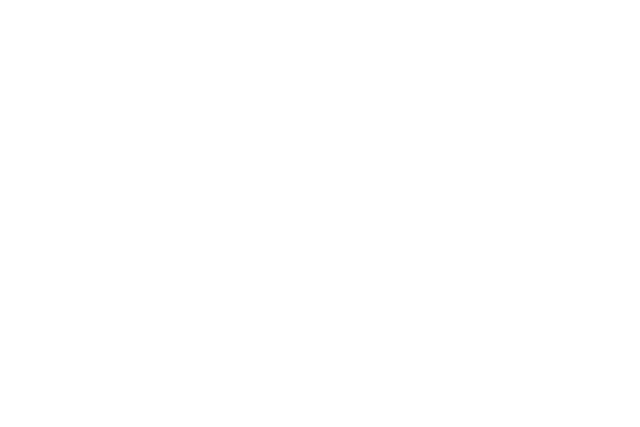
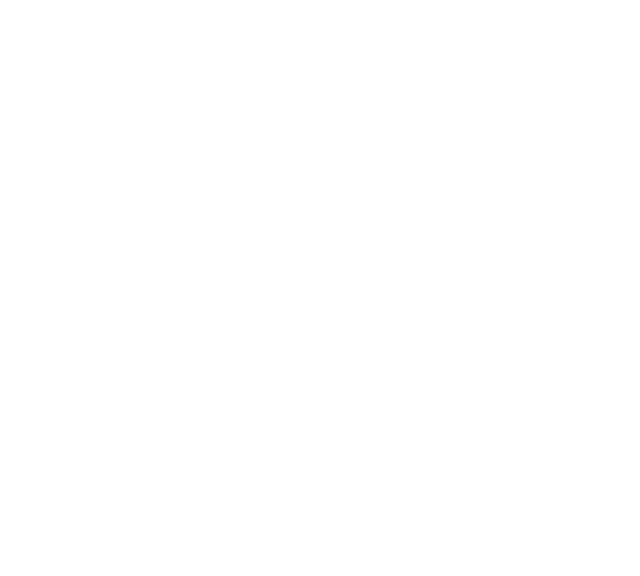
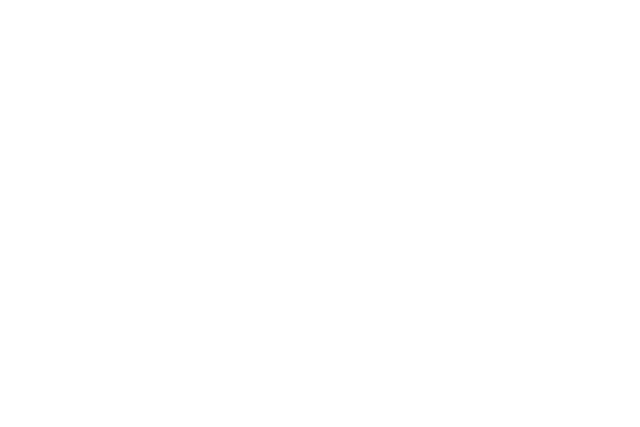
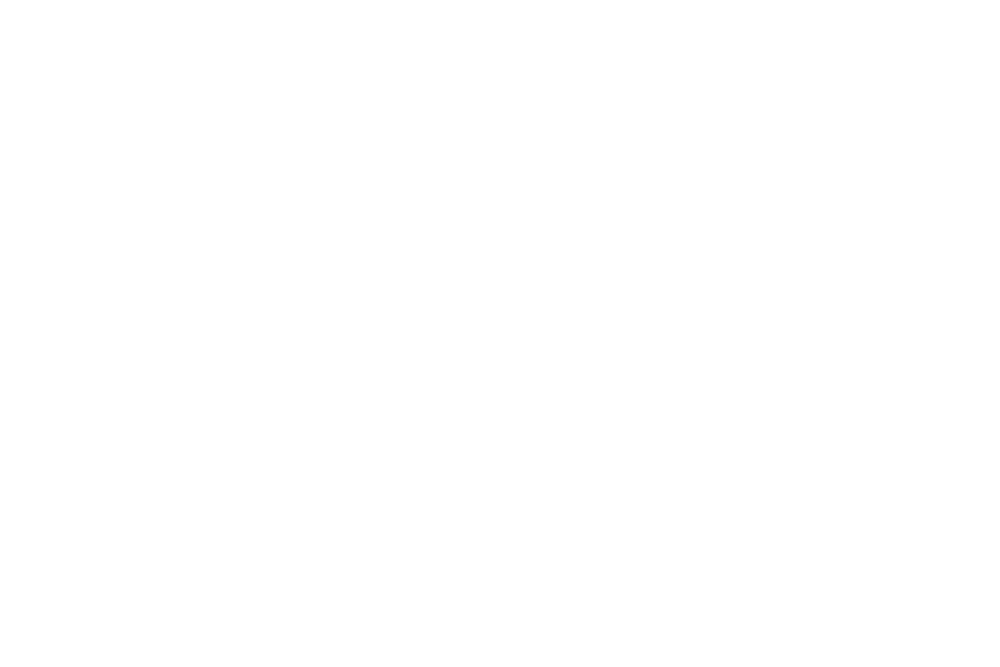
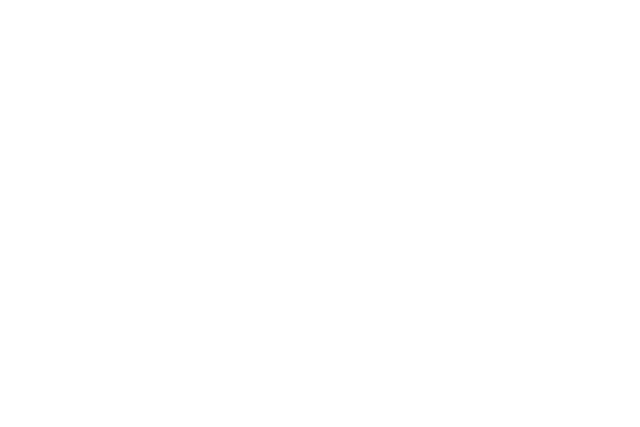
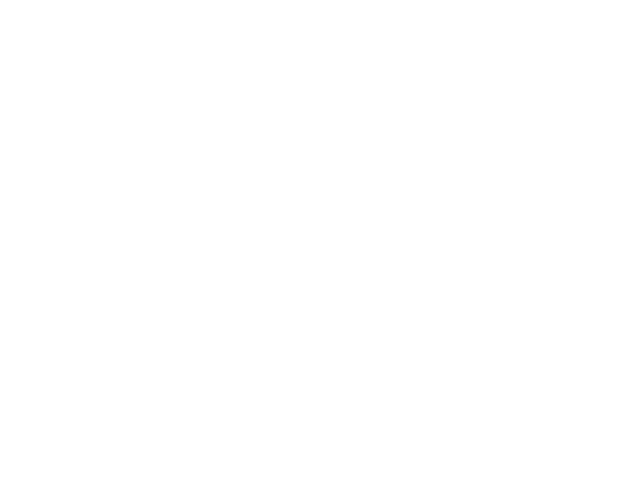
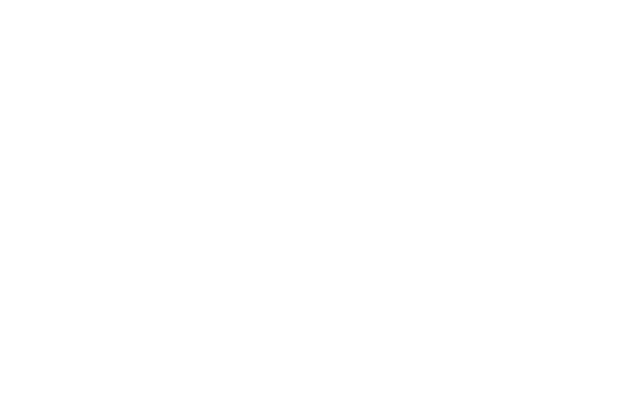
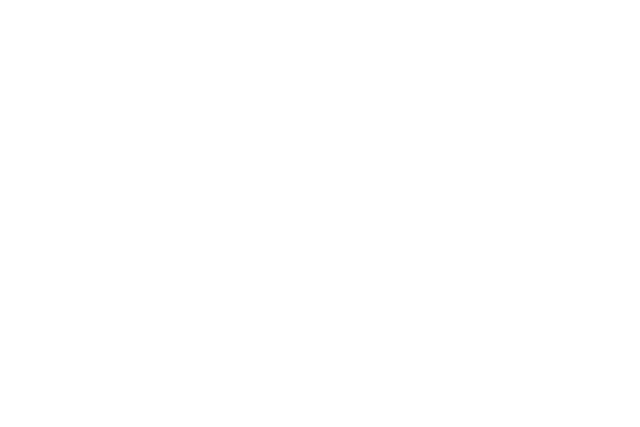
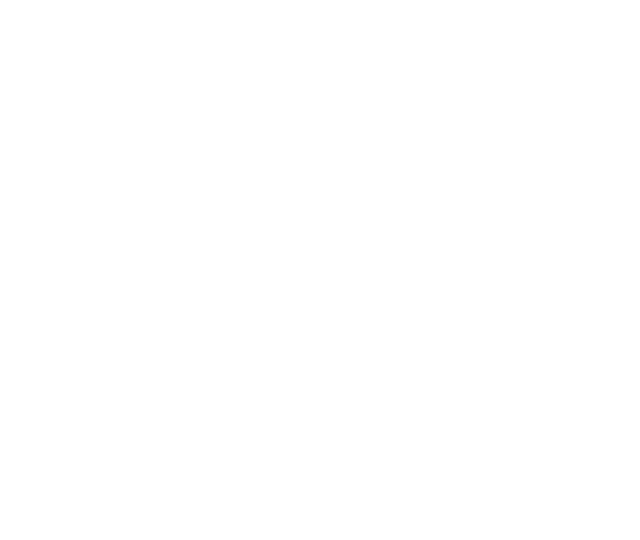
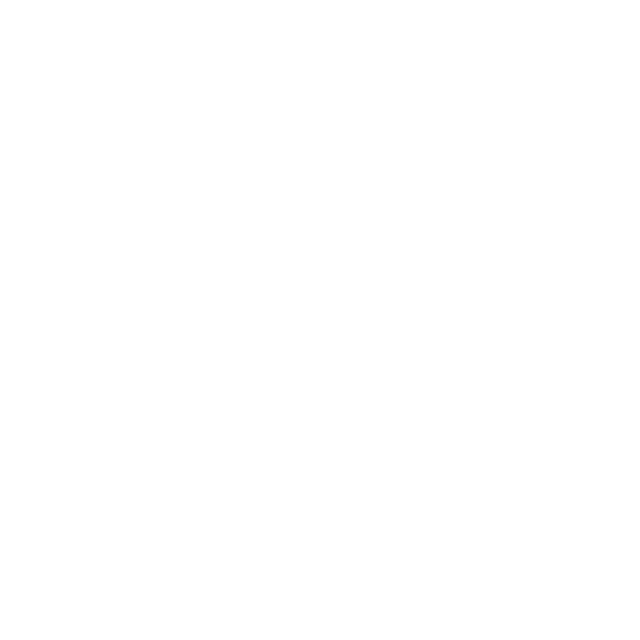

In [10]:
# convert to a beautiful soup object
soup_2 = bs(res_2.content, 'html.parser')

# get body
body_2 = soup_2.body
print(body_2.prettify())

In [11]:
# find all "h3" tags and store these
animals_2_html = soup_2.body.find_all("h3")
print(animals_2_html)
# add all animals within tags to array 
animals_2 = []
for html_match in animals_2_html[1:]:
    animal = html_match.text.strip()
    print(animal)
    animals_2.append(animal)
    if animal == "Zebra": break

[<h3>Ina</h3>, <h3><strong>Aardvark</strong></h3>, <h3><strong>Baboon</strong></h3>, <h3 style="text-align: justify"><strong>Cheetah</strong></h3>, <h3 style="text-align: justify"><strong>Desert Warthog</strong></h3>, <h3 style="text-align: justify"><strong>Elephant</strong></h3>, <h3 style="text-align: justify"><strong>Fennec Fox</strong></h3>, <h3 style="text-align: justify"><strong>Giraffe</strong></h3>, <h3 style="text-align: justify"><strong>Hippo</strong></h3>, <h3 style="text-align: justify"><strong>Impala</strong></h3>, <h3 style="text-align: justify"><strong>Jackal</strong></h3>, <h3 style="text-align: justify"><strong>Klipspringer</strong></h3>, <h3 style="text-align: justify"><strong>Lion</strong></h3>, <h3 style="text-align: justify"><strong>Magpie</strong></h3>, <h3 style="text-align: justify"><strong>Nyala</strong></h3>, <h3 style="text-align: justify"><strong>Otter</strong></h3>, <h3 style="text-align: justify"><strong>Porcupine</strong></h3>, <h3>Quelea Quelea</h3>, <h3

### Website 3

In [12]:
# Website 3
url_website_3 = "https://animalsake.com/african-animals-list"

res_3 = requests.get(url_website_3)
txt_3 = res_3.text
status_3 = res_3.status_code

Use the `prettify` function to print the output in a properly indexed format to easily identify how the words are encoded on the website.

In [13]:
# convert to a beautiful soup object
soup_3 = bs(res_3.content, 'html.parser')

# get body
body_3 = soup_3.body
print(body_3.prettify())

<body class="post-template-default single single-post postid-7067 single-format-standard wp-custom-logo custom-header full-width-content genesis-breadcrumbs-visible genesis-footer-widgets-visible sticky-header no-js">
 <svg focusable="false" height="0" role="none" style="visibility: hidden; position: absolute; left: -9999px; overflow: hidden;" viewbox="0 0 0 0" width="0" xmlns="http://www.w3.org/2000/svg">
  <defs>
   <filter id="wp-duotone-dark-grayscale">
    <fecolormatrix color-interpolation-filters="sRGB" type="matrix" values="
						.299 .587 .114 0 0
						.299 .587 .114 0 0
						.299 .587 .114 0 0
						.299 .587 .114 0 0
					">
    </fecolormatrix>
    <fecomponenttransfer color-interpolation-filters="sRGB">
     <fefuncr tablevalues="0 0.49803921568627" type="table">
     </fefuncr>
     <fefuncg tablevalues="0 0.49803921568627" type="table">
     </fefuncg>
     <fefuncb tablevalues="0 0.49803921568627" type="table">
     </fefuncb>
     <fefunca tablevalues="1 1" type="ta

In [14]:
# find all "h3" tags and store these
animals_3_html = soup_3.body.find_all("h3")

# add all animals within tags to array 
animals_3 = []
for html_match in animals_3_html:
    animal = html_match.text.strip()
    # Remove African name
    if "~" in animal:
        index = animal.index("~")
        animal = animal[0:index - 1]
    print(animal)
    animals_3.append(animal)

Aardvark
Aardwolf
Addax
Addra Gazelle
African Gray Parrot
Baboon
Bat-eared Fox
Beisa Oryx
Blue Monkey
Bongo
Bonobo
Bontebok
Buffalo
Burchell’s Zebra
Bushbaby or Galago
Bushbuck
Bushpig
Camel
Caracal
Cheetah
Chimpanzee
Civet
Colobus Monkey
Crocodile
Dik-dik
Duiker
Eland
African Elephant
Fennec Fox
Forest Hog
Fossa
Gecko
Genet
Gerbil
Gerenuk or Waller’s Gazelle
Giraffe
Gembsok Oryx
Gorilla
Greater Kudu
Grant’s Gazelle
Ground Squirrel
Grysbok
Hare
Hedgehog
Hippopotamus
Honey Badger
Hyenas (Spotted)
Hyenas (Striped)
Hyrax
Impala
Jackal
Klipspringer
Lechwe Antelope
Lemur
Leopard
Lesser Kudu
Lichtenstein’s Hartebeest
African Lion
Madagascar Cockroach
Mamba
Mandrill
Meerkats
Mongoose
Monitor Lizard
Nyala
Okapi
Oribi
Ostrich
Otter
Pangolin
Patas
Porcupine
Puff Adder
Puku
Reedbuck
Rhinoceros
Roan
Sable Antelope
Serval
Cape Elephant Shrew
Sitatunga
Steinbok
Suni
Thomson’s Gazelle
Topi
Vervet Monkey
Warthog
Waterbuck
Wild Ass
African Wild Dog
Wild Cat
Wildebeest or Gnu


## Create Final Array
Now we create a final array that includes (unique) animals from the 'animals_1', 'animals_2', and 'animals_3' lists and from the current nature array on site

In [15]:
# 1. Create list of current words in 'nature' dict
nature_list = ["wildlife",
    "fauna",
    "habitat",
    "habitats",
    "conservation",
    "animals",
    "birds",
    "animal",
    "flora",
    "livestock",
    "hunting",
    "parks",
    "biota",
    "geese",
    "egyptian geese",
    "egyptian goose",
    "goose",
    "wilderness",
    "wild",
    "park",
    "natural",
    "nature",
    "hunt",
    "camping",
    "wildcat",
    "sauvage",
    "savage",
    "wild-type",
    "waterfowl",
    "deer",
    "barbary stag",
    "ecology",
    "biodiversity",
    "forest",
    "conservancy",
    "wildfowl",
    "endangered species",
    "conservationists",
    "raptors",
    "birdlife",
    "wetlands",
    "otters",
    "spotted necked otter",
    "african clawless otter",
    "congo clawless otter",
    "eurasian otter",
    "fisheries",
    "waterbirds",
    "poachers",
    "bird sanctuary",
    "ecosystems",
    "reptiles",
    "naturalists",
    "marine",
    "waterways",
    "antelope",
    "wildflower",
    "ecotourism",
    "seabird",
    "turtles",
    "vegetation",
    "tortoises",
    "african spurred tortoise",
    "amphibians",
    "wolves",
    "stone curlew",
    "foxes",
    "sacred ibis",
    "african sacred ibis",
    "monarch butterfly",
    "african monarch butterfly",
    "plain tiger",
    "african monarch",
    "goshawk",
    "african goshawk",
    "cirl bunting",
    "leopards",
    "panther",
    "safari park",
    "seafowl",
    "bird of passage",
    "zoography",
    "zoological garden",
    "shore bird",
    "african black oystercatcher",
    "water thick-knee",
    "white-fronted plover",
    "blacksmith plover",
    "common sandpiper",
    "zoo",
    "mammal",
    "bird",
    "conservationist",
    "gallery forest",
    "zoographer",
    "wetland",
    "zoophagy",
    "bird table",
    "sea cow",
    "manatee",
    "tropical rain forest",
    "sea elephant",
    "elephant seal",
    "sea leopard",
    "aquatic bird",
    "birdwatch",
    "zoopathology",
    "wild dog",
    "african wild dog",
    "marine animal",
    "african elephant",
    "sanctuary",
    "miombo woodland",
    "woodland",
    "elephant bird",
    "birdling",
    "birdcatching",
    "rangership",
    "zoological",
    "wildgrave",
    "exotic",
    "indigenous",
    "aquatic",
    "terrestrial",
    "endangered",
    "migratory",
    "coastal",
    "captive",
    "vertebrate",
    "threatened",
    "fascinating",
    "nocturnal",
    "mammalian",
    "scenic",
    "endemic",
    "ocean",
    "underwater",
    "winged",
    "predatory",
    "fish",
    "plants",
    "forests",
    "forestry",
    "soil",
    "timber",
    "cattle",
    "insects",
    "soils",
    "wildlands",
    "wildflowers",
    "pesticides",
    "fishing",
    "extinction",
    "woods",
    "sanctuaries",
    "ecosystem",
    "elephants",
    "mammals",
    "outdoors",
    "ducks",
    "poaching",
    "harvesting",
    "watersheds",
    "decimation",
    "waterfalls",
    "forage",
    "invertebrates",
    "feeding",
    "extermination",
    "pastoralists",
    "shellfish",
    "whales",
    "buffalo",
    "african buffalo",
    "songbirds",
    "eagles",
    "seals",
    "squirrels",
    "hunted",
    "depleted",
    "inhabit",
    "exterminated",
    "forest ranger",
    "game warden",
    "gamekeeper",
    "park",
    "natural resources",
    "preservationist",
    "preserved",
    "safari",
    "serengeti",
    "agricultural",
    "biosphere",
    "environmental",
    "freshwater",
    "herbivores",
    "wildland"]

previous_length = len(nature_list)

# Convert all lists to sets to remove duplicates & combine all animals into 1 set
all_animals = set(animals_1).union(set(animals_2)).union(set(animals_3))
print(len(all_animals))

# 2. Add 'all_animals' set words to final list
for word in all_animals:
    lc_word = word.lower()
    # remove commas from words (some extracted words had commas)
    if ',' in lc_word:
        lc_word = lc_word.replace(",", "")
    # remove periods from words (some extracted words had periods)
    if '.' in lc_word:
        lc_word = lc_word.replace(".", "")
    # ignore extinct animals
    if "saurus" in lc_word or "therium" in lc_word: continue 
    # check if already in final list, and if not, add to final list
    if lc_word not in nature_list: 
        nature_list.append(lc_word)
        
print(nature_list, previous_length, len(nature_list))

921
['wildlife', 'fauna', 'habitat', 'habitats', 'conservation', 'animals', 'birds', 'animal', 'flora', 'livestock', 'hunting', 'parks', 'biota', 'geese', 'egyptian geese', 'egyptian goose', 'goose', 'wilderness', 'wild', 'park', 'natural', 'nature', 'hunt', 'camping', 'wildcat', 'sauvage', 'savage', 'wild-type', 'waterfowl', 'deer', 'barbary stag', 'ecology', 'biodiversity', 'forest', 'conservancy', 'wildfowl', 'endangered species', 'conservationists', 'raptors', 'birdlife', 'wetlands', 'otters', 'spotted necked otter', 'african clawless otter', 'congo clawless otter', 'eurasian otter', 'fisheries', 'waterbirds', 'poachers', 'bird sanctuary', 'ecosystems', 'reptiles', 'naturalists', 'marine', 'waterways', 'antelope', 'wildflower', 'ecotourism', 'seabird', 'turtles', 'vegetation', 'tortoises', 'african spurred tortoise', 'amphibians', 'wolves', 'stone curlew', 'foxes', 'sacred ibis', 'african sacred ibis', 'monarch butterfly', 'african monarch butterfly', 'plain tiger', 'african monarc

### Convert all plural words to singular
We will now convert all plural words to their singular form to ensure our ASTRSC tool can detect both the singular and plural forms of the words. 

In [17]:
i = 0
for word in nature_list:
    if len(word) != 0 and word[-1] == "s":
        i += 1
#         print(word)
print(i)

j = 0
stemmer = SnowballStemmer(language='english')
for word in nature_list:
    print(word + ' --> ' + stemmer.stem(word))

188
wildlife --> wildlif
fauna --> fauna
habitat --> habitat
habitats --> habitat
conservation --> conserv
animals --> anim
birds --> bird
animal --> anim
flora --> flora
livestock --> livestock
hunting --> hunt
parks --> park
biota --> biota
geese --> gees
egyptian geese --> egyptian gees
egyptian goose --> egyptian goos
goose --> goos
wilderness --> wilder
wild --> wild
park --> park
natural --> natur
nature --> natur
hunt --> hunt
camping --> camp
wildcat --> wildcat
sauvage --> sauvag
savage --> savag
wild-type --> wild-typ
waterfowl --> waterfowl
deer --> deer
barbary stag --> barbary stag
ecology --> ecolog
biodiversity --> biodivers
forest --> forest
conservancy --> conserv
wildfowl --> wildfowl
endangered species --> endangered speci
conservationists --> conservationist
raptors --> raptor
birdlife --> birdlif
wetlands --> wetland
otters --> otter
spotted necked otter --> spotted necked ott
african clawless otter --> african clawless ott
congo clawless otter --> congo clawless o

### Manually Take Out Irrelevant Strings
We will now remove any irrelevant strings from the new words

In [18]:
nature_final = [
    "wildlife",
    "fauna",
    "habitat",
    "habitats",
    "conservation",
    "animals",
    "birds",
    "animal",
    "flora",
    "livestock",
    "hunting",
    "parks",
    "biota",
    "geese",
    "egyptian geese",
    "egyptian goose",
    "goose",
    "wilderness",
    "wild",
    "park",
    "natural",
    "nature",
    "hunt",
    "camping",
    "wildcat",
    "sauvage",
    "savage",
    "wild-type",
    "waterfowl",
    "deer",
    "barbary stag",
    "ecology",
    "biodiversity",
    "forest",
    "conservancy",
    "wildfowl",
    "endangered species",
    "conservationists",
    "raptors",
    "birdlife",
    "wetlands",
    "otters",
    "spotted necked otter",
    "african clawless otter",
    "congo clawless otter",
    "eurasian otter",
    "fisheries",
    "waterbirds",
    "poachers",
    "bird sanctuary",
    "ecosystems",
    "reptiles",
    "naturalists",
    "marine",
    "waterways",
    "antelope",
    "wildflower",
    "ecotourism",
    "seabird",
    "turtles",
    "vegetation",
    "tortoises",
    "african spurred tortoise",
    "amphibians",
    "wolves",
    "stone curlew",
    "foxes",
    "sacred ibis",
    "african sacred ibis",
    "monarch butterfly",
    "african monarch butterfly",
    "plain tiger",
    "african monarch",
    "goshawk",
    "african goshawk",
    "cirl bunting",
    "leopards",
    "panther",
    "safari park",
    "seafowl",
    "bird of passage",
    "zoography",
    "zoological garden",
    "shore bird",
    "african black oystercatcher",
    "water thick-knee",
    "white-fronted plover",
    "blacksmith plover",
    "common sandpiper",
    "zoo",
    "mammal",
    "bird",
    "conservationist",
    "gallery forest",
    "zoographer",
    "wetland",
    "zoophagy",
    "bird table",
    "sea cow",
    "manatee",
    "tropical rain forest",
    "sea elephant",
    "elephant seal",
    "sea leopard",
    "aquatic bird",
    "birdwatch",
    "zoopathology",
    "wild dog",
    "african wild dog",
    "marine animal",
    "african elephant",
    "sanctuary",
    "miombo woodland",
    "woodland",
    "elephant bird",
    "birdling",
    "birdcatching",
    "rangership",
    "zoological",
    "wildgrave",
    "exotic",
    "indigenous",
    "aquatic",
    "terrestrial",
    "endangered",
    "migratory",
    "coastal",
    "captive",
    "vertebrate",
    "threatened",
    "fascinating",
    "nocturnal",
    "mammalian",
    "scenic",
    "endemic",
    "ocean",
    "underwater",
    "winged",
    "predatory",
    "fish",
    "plants",
    "forests",
    "forestry",
    "soil",
    "timber",
    "cattle",
    "insects",
    "soils",
    "wildlands",
    "wildflowers",
    "pesticides",
    "fishing",
    "extinction",
    "woods",
    "sanctuaries",
    "ecosystem",
    "elephants",
    "mammals",
    "outdoors",
    "ducks",
    "poaching",
    "harvesting",
    "watersheds",
    "decimation",
    "waterfalls",
    "forage",
    "invertebrates",
    "feeding",
    "extermination",
    "pastoralists",
    "shellfish",
    "whales",
    "buffalo",
    "african buffalo",
    "songbirds",
    "eagles",
    "seals",
    "squirrels",
    "hunted",
    "depleted",
    "inhabit",
    "exterminated",
    "forest ranger",
    "game warden",
    "gamekeeper",
    "park",
    "natural resources",
    "preservationist",
    "preserved",
    "safari",
    "serengeti",
    "agricultural",
    "biosphere",
    "environmental",
    "freshwater",
    "herbivores",
    "wildland",
    "pygmy hippopotamus",
    "ladybug",
    "golden eagle",
    "oranda goldfish",
    "oryxes",
    "cheetah",
    "rabbit",
    "scorpion",
    "crocodile",
    "critically endangered",
    "patas monkies",
    "mambas",
    "crocodiles",
    "comet moth",
    "bongos",
    "eagle",
    "white rhinoceroses",
    "madagascar cockroach",
    "dolphins",
    "eastern green mamba",
    "lizard",
    "night heron",
    "twig snake",
    "ostrich",
    "flycatcher",
    "vervet monkey",
    "northern white rhinoceros",
    "parrot",
    "shark",
    "angelshark",
    "olive baboon",
    "green bee eater",
    "flamingos",
    "bat",
    "shrimp",
    "fiddler crab",
    "doves",
    "jumping spider",
    "carpet viper",
    "horsefly",
    "jackson’s chameleon",
    "gorillas",
    "donkeys",
    "hyena",
    "mosquito",
    "sparrow",
    "macaque",
    "short-eared owl",
    "dragonfly",
    "chimps",
    "birds of prey",
    "suni",
    "cape buffalo",
    "mountain",
    "striped hyenas",
    "hyenas",
    "mountain gorilla",
    "striped hyena",
    "duck",
    "madagascar hissing cockroach",
    "african civet",
    "cuckoo",
    "nile crocodiles",
    "horned adder",
    "butterflies",
    "cape elephant shrew",
    "hippo",
    "moth",
    "guinea fowls",
    "geckos",
    "brown hyena",
    "shrew",
    "yellow cobra",
    "pigs",
    "warbler",
    "carpenter ant",
    "woodpecker",
    "wild boars",
    "chimpanzees",
    "snakes",
    "hammerheads",
    "liger",
    "extirpated",
    "bumblebee",
    "jellyfish",
    "oryx",
    "southeastern black rhino",
    "catfish",
    "peacock",
    "radiated tortoise",
    "lion",
    "cockroach",
    "elephant",
    "eurasian jay",
    "sardines",
    "wild cat",
    "cod",
    "springbok",
    "horses",
    "jackal",
    "sea eagle",
    "frog",
    "hyrax",
    "cross river gorilla",
    "heron",
    "hoopoe",
    "water buffalo",
    "common furniture beetle",
    "black rhino",
    "zebu",
    "scimitar-horned oryx",
    "hippos",
    "eel",
    "warthogs",
    "kingfishers",
    "african tree toad",
    "impala",
    "gerbils",
    "vinegaroon",
    "biscuit beetle",
    "insect",
    "wolf",
    "devil’s coach horse beetle",
    "lesser kudu",
    "gnat",
    "bush",
    "amphibian",
    "bird snake",
    "ring-tailed lemur",
    "leaf-tailed gecko",
    "huntsman spider",
    "bichir",
    "common wildebeest",
    "egyptian cobra",
    "egyptian asp",
    "linnet",
    "rhinoceroses",
    "zebras",
    "gazelles",
    "griffon vulture",
    "porcupine",
    "forest cobra",
    "egyptian tortoise",
    "spider ball python",
    "lions",
    "forest hog",
    "african penguin",
    "dusky shark",
    "barb",
    "mole snake",
    "madagascar jacana",
    "donkey",
    "termite",
    "chickens",
    "moorhen",
    "african grey parrot",
    "graylag goose",
    "red deer",
    "hippopotamuses",
    "wryneck",
    "lionfish",
    "leopard",
    "nile crocodile",
    "kudu",
    "tuna",
    "golden oriole",
    "stick insect",
    "aardvarks",
    "european polecat",
    "seal",
    "african bush elephant",
    "red kite",
    "grey mouse lemur",
    "snake",
    "false widow spider",
    "guinea fowl",
    "lechwe antelope",
    "crested crane",
    "blue whale",
    "impalas",
    "stork",
    "rat",
    "forest elephant",
    "puku",
    "civets",
    "bald eagle",
    "orb weaver",
    "mongoose",
    "vine snake",
    "baboon",
    "skink lizard",
    "king cobra",
    "sheep",
    "rats",
    "gerbil",
    "tortoise",
    "pheasant",
    "horned viper",
    "bat-eared fox",
    "silky shark",
    "dolphin",
    "dik-dik",
    "fossa",
    "tigers",
    "tiger beetle",
    "goat",
    "mamba",
    "chicken",
    "manta rays",
    "xerus",
    "camel",
    "sharks",
    "quail",
    "chimpanzee",
    "okapi",
    "senegal parrot",
    "marabou stork",
    "achrioptera manga",
    "brown bear",
    "desert rain frog",
    "monkey",
    "river turtle",
    "african wild dogs",
    "african palm civet",
    "rhinoceros",
    "african gray parrot",
    "stiletto snake",
    "african wild dogs",
    "bush viper",
    "fox",
    "caracals",
    "wild ass",
    "honey badger",
    "rhinos",
    "nigerian goat",
    "rock hyrax",
    "pangolin",
    "peregrine falcon",
    "crane",
    "vulnerable",
    "hippopotamus",
    "crow",
    "song thrush",
    "fire ball python",
    "dinopithecus",
    "electric catfish",
    "lappet-face vulture",
    "banana spider",
    "squirrel",
    "bush baby",
    "marlin",
    "hamadryas baboon",
    "nyala",
    "cat",
    "bushbaby",
    "galago",
    "woodlouse spider",
    "spotted hyena",
    "kestrel",
    "black widow",
    "satanic leaf-tailed gecko",
    "goldcrest",
    "patas",
    "scimitar oryx",
    "desert warthog",
    "barracuda",
    "grasshopper",
    "coton de tulear",
    "egyptian mau",
    "red spitting cobra",
    "camels",
    "hedgehog",
    "duiker",
    "bonobos",
    "housefly",
    "sand viper",
    "mozambique spitting cobra",
    "common hippos",
    "vultures",
    "goliath beetle",
    "porpoise",
    "vulture",
    "oribi",
    "hyraxes",
    "hamster",
    "black rhinoceros",
    "bearded vulture",
    "green bee-eater",
    "fennec fox",
    "gembsok oryx",
    "woodlouse",
    "buffaloes",
    "waterbuck",
    "dumeril’s boa",
    "indri",
    "brown dog tick",
    "black rhinoceroses",
    "common carp",
    "galapagos shark",
    "grant’s gazelle",
    "axanthic ball python",
    "bonobo",
    "fly",
    "buffalos",
    "fennec foxes",
    "african lion",
    "grey heron",
    "panthers",
    "rooster",
    "parakeet",
    "african golden cat",
    "otter",
    "worm",
    "lappet-faced vulture",
    "strawberry hermit crab",
    "redstart",
    "black widow spider",
    "wildebeest",
    "gnu",
    "lichtenstein’s hartebeest",
    "fruit bat",
    "burkina faso",
    "orange baboon tarantula",
    "patas monkey",
    "weasel",
    "termites",
    "cobra",
    "uromastyx",
    "spotted hyenas",
    "sea turtle",
    "agama lizard",
    "turaco",
    "horse",
    "egyptian vulture",
    "sea turtles",
    "giant african land snail",
    "wildebeest",
    "gnu",
    "mongooses",
    "parrots",
    "gorilla",
    "saturniidae moth",
    "sunset ball python",
    "flamingoes",
    "african buffalos",
    "flamingo",
    "addra gazelle",
    "thomson’s gazelle",
    "blind snake",
    "lavender albino ball python",
    "abyssinian",
    "goliath tigerfish",
    "lappet-faced vulture",
    "eastern lowland gorilla",
    "sable bull",
    "sable antelope",
    "goats",
    "european goldfinch",
    "warthog",
    "tick",
    "civet",
    "cichlid",
    "whinchat",
    "jacana",
    "banana cinnamon ball python",
    "bush elephant",
    "mouse",
    "western lowland gorillas",
    "eland",
    "giant ground pangolin",
    "brown-banded cockroach",
    "african elephants",
    "frogs",
    "wild dogs",
    "zonkey",
    "sei whale",
    "slug",
    "scorpions",
    "african jacana",
    "african bullfrog",
    "dugongs",
    "sand cat",
    "hawk moth caterpillar",
    "yellowfin tuna",
    "roan",
    "ibex",
    "madagascar tree boa",
    "african forest elephants",
    "orange dream ball python",
    "viper",
    "elephant shrew",
    "ethiopian wolf",
    "yellow mongoose",
    "bontebok",
    "aidi",
    "sperm whale",
    "kitefin shark",
    "eastern lowland gorillas",
    "tarantula hawk",
    "rodents",
    "white rhinoceros",
    "praying mantis",
    "monkeys",
    "meerkats",
    "gecko",
    "black panther",
    "grasshoppers",
    "minke whale",
    "coryphodon",
    "wildebeests",
    "cheetahs",
    "savannah elephants",
    "honey bee",
    "cicada",
    "eel catfish",
    "hedgehogs",
    "forest elephants",
    "white ferret",
    "albino ferrets",
    "bee-eater",
    "greater kudu",
    "cranes",
    "guinea fowl",
    "africanized bee",
    "killer bee",
    "mallard",
    "gerenuk",
    "waller’s gazelle",
    "kori bustard",
    "dwarf crocodile",
    "african lions",
    "fin whale",
    "pufferfish",
    "bongo",
    "manatees",
    "dormouse",
    "spiny bush viper",
    "tsetse fly",
    "glow worm",
    "bale mountain vervet",
    "vanga",
    "black rhinos",
    "sable antelope",
    "civets",
    "european robin",
    "chameleon",
    "rock python",
    "anteaters",
    "african bush elephants",
    "red fox",
    "owls",
    "peringuey’s adder",
    "bloodhound",
    "snail",
    "european bee-eater",
    "steinbok",
    "herons",
    "goliath frog",
    "fulvous whistling duck",
    "western lowland gorilla",
    "hornbill",
    "crab spider",
    "bed bugs",
    "spider wasp",
    "snouted cobra",
    "humpback whale",
    "avocets",
    "flea",
    "meerkat",
    "wildebeest",
    "myna bird",
    "african savanna elephant",
    "hare",
    "reedbuck",
    "chimpanzees",
    "the blue monkey",
    "gazelle",
    "shoebill stork",
    "woodpeckers",
    "caecilian",
    "pike",
    "dung beetle",
    "zebra",
    "codling moth",
    "beisa oryx",
    "brahminy blindsnake",
    "western gorilla",
    "african forest elephant",
    "bushbuck",
    "cape bushbuck",
    "basenji dog",
    "ant",
    "kudus",
    "mealybug",
    "deathwatch beetle",
    "yellow belly ball python",
    "sitatunga",
    "bale monkey",
    "aardvark",
    "aye-aye",
    "zebra spitting cobra",
    "humpback whales",
    "sable ferret",
    "african fish eagle",
    "rhino",
    "maggot",
    "no see ums",
    "no-see-ums",
    "hyenas",
    "leech",
    "bats",
    "eastern gorilla",
    "thrush",
    "klipspringer",
    "german cockroach",
    "common hippopotamus",
    "colobus monkey",
    "beetle",
    "fruit fly",
    "great dane",
    "nightingale",
    "bees",
    "magpie",
    "mantella frog",
    "sand crab",
    "american cockroach",
    "genet",
    "hognose snake",
    "spotted hyenas",
    "cricket",
    "willow warbler",
    "quelea quelea",
    "beetles",
    "nguni cattle",
    "invertebrate",
    "banana ball python",
    "falcon",
    "antelopes",
    "stingray",
    "earwig",
    "red-billed quelea bird",
    "lemur",
    "barn swallow",
    "african clawed frog",
    "zebra snake",
    "sulcata tortoise",
    "centipede",
    "pythons",
    "osprey",
    "african civets",
    "giraffe",
    "lungfish",
    "monitor lizard",
    "freeway ball python",
    "gaboon viper",
    "stallion",
    "robin",
    "lizards",
    "puss moth",
    "wasp",
    "lesser jacana",
    "mule",
    "mandrill",
    "zorse",
    "peafowls",
    "false cobra",
    "barn owl",
    "smokybrown cockroach",
    "moths",
    "shoebill",
    "whalehead",
    "whale-headed stork",
    "whalebill",
    "shoebill stork",
    "ostriches",
    "salmon",
    "crab",
    "bushpig",
    "mole cricket",
    "wolf spider",
    "baboons",
    "albacore tuna",
    "burchell’s zebra",
    "albatrosses",
    "barbary boar",
    "lemurs",
    "boomslang",
    "seahorse",
    "ortolan bunting",
    "gypsy moth",
    "topi",
    "jackals",
    "desert locust",
    "killer clown ball python",
    "blue monkey",
    "pelicans",
    "spitting cobra",
    "butterfly",
    "leopard tortoise",
    "brazilian treehopper",
    "grey-crowned crane",
    "portuguese man-of-war",
    "freshwater eel",
    "mayfly",
    "blister beetle",
    "madora moth",
    "firefly",
    "common house spider",
    "dog tick",
    "beecroft’s flying squirrels",
    "shrews",
    "black mamba",
    "armyworm",
    "owl",
    "grevy’s zebra",
    "hoopoes",
    "mole",
    "common raven",
    "ibis",
    "tree frog",
    "aardwolf",
    "extinct",
    "lobsters",
    "cape hyrax",
    "locust",
    "serval",
    "rhino viper",
    "caracal",
    "pigeon",
    "needlefish",
    "ground squirrel",
    "pangolins",
    "common buzzard",
    "ligers",
    "cow",
    "reptilian",
    "earthworm",
    "reptile",
    "green mamba",
    "kingfisher",
    "bee",
    "jerboas",
    "addax",
    "white rhino",
    "kenyan sand boa",
    "brookesia micra",
    "spotted hyaena",
    "boas",
    "aye aye",
    "naked mole rat",
    "millipede",
    "caterpillar",
    "senepol cattle",
    "devils coach horse beetle",
    "giraffes",
    "puff adder",
    "dragonflies",
    "glass lizard",
    "west african wild dog",
    "cows",
    "western green mamba",
    "lionfish",
    "cuckoos",
    "goliath frogs",
    "grysbok",
    "jerboa",
    "swan",
    "desert ghost ball python",
    "pelican",
  ];

### Conclusion
After finishing this process, we were able to increase the number of words in the dictionary by over 4X.

~ End of notebook ~